<center><h2>Midterm - Data Science option</h2></center>

This is one of two options for the midterm. 

This option is in-depth analysis of online shopping behavior.  

We are asking you to do intensive analysis of consumer behavioral data.

The data
----

The dataset is from "Online Shoppers Purchasing Intention Dataset Data Set" https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The data is in the file "online_shoppers_intention.csv". 

- The dataset consists of 10 numerical and 8 categorical variables.
- The 'Revenue' variable can be used as the target label. This variable is imbalanced, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
- The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of "Exit Rate" feature for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

The tasks
-----

Perform the following tasks:

1. Task 1 - Build a highly predictive classification model. Train the model on data entries corresponding to the months of June-Dec, and test the model on data entries corresponding to Feb-March. (50 points)

    1. Fit a logistic regression and at least one other classification model. Find and explain important features. 
    1. Report and interpret the most meaningful classifications metrics
    1. Show and explain the hyper-parameter fitting process.

    Point breakdown:
    
    - (10 points) Basic exploratory data analysis (EDA): OK
        - Appropriate univariate descriptive statistics and figures: OK
        - Appropriate bivariate descriptive statistics and figures: OK
    - ( 5 points) Advanced EDA: OK
        - Free-response, shows us what they know! 
    - ( 5 points) Train/test split: OK
    - (10 points) Feature selection: OK
    - (15 points) Model fitting: OK
    - ( 5 points) Performance points: OK
        - F1 score is in the top quartile among all students 


2.  Task 2: Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.  (25 points).

    1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters as you can.
    2. Return plots and cluster images generated for the data.
    3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g,. which cluster represent new shoppers vs. brand conscious shoppers etc.).
    
    Point breakdown:
    
    - (15 points) Clustering code: OK
    - (10 points) Clustering analysis: OK

3. Task 3: Consider you have training data (with the 'Revenue' attribute) for records from June-Sept only. For all records from Oct-Dec, the 'Revenue' attribute is missing. Build a semi-supervised self-labeling model to estimate 'Revenue' for the missing records in Oct-Dec and then fit your classifier. Report classification performance on Feb-March data set with and without the self-labeled data. (15 points)

    1. If you do not consider the records from Oct-Dec, generate the classification performance on test data
    2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.

    Point breakdown:
    
    - ( 2 points) Correctly splits the data by month into labeled, unlabeled, and test 
    - (8 points) Generate labels for unlabeled samples with a self labeling technique
    - (5 points) Compare and contrast performance difference on test dataset between labels only and labels & self-labels.

-----

Remaining points breakdown:
 - (10 points) Style and clarity: OK 
     - Please attempt to write clear, well-commented code and explanations in markdown cells, where appropriate. 

------

Your deliverables:

- Code in a single .ipynb notebook.
- Comments where appropriate.
- Figures, graphs, and tables where appropriate.
- Text explanations (in markdown cells) of what is being done and why.

__That's it. Good Luck!__

## Libraries

In [13]:
# for basic operations
import numpy as np
import pandas as pd

# for getting the file path
import os
#print(os.listdir('../input'))

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [9]:
df = pd.read_csv('online_shoppers_intention.csv')

In [10]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Task 1

## EDA

In [4]:
# describing the data

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# checking the percentage of missing data contains in all the columns

missing_percentage = df.isnull().sum()/df.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


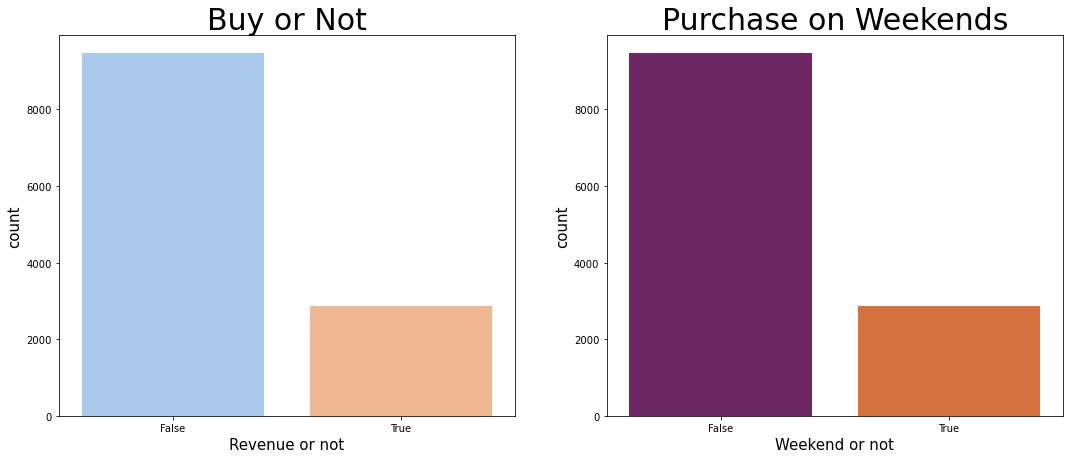

In [14]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [15]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

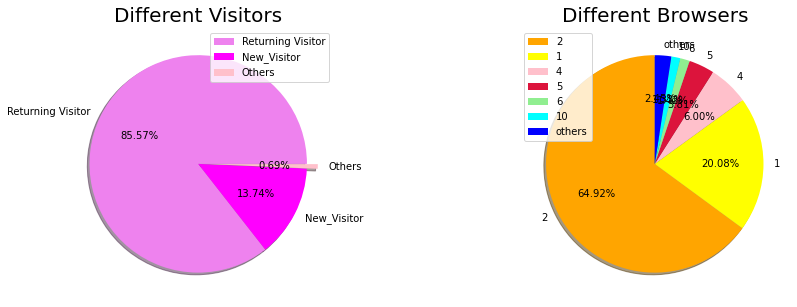

In [19]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (15, 5)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 20)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

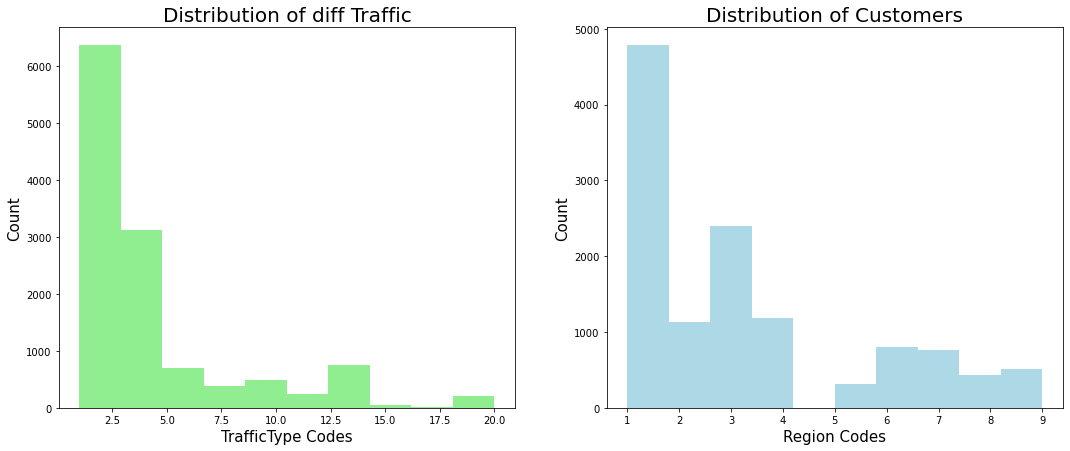

In [21]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 20)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(df['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 20)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [40]:
# checking the no. of OSes each user is having

df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

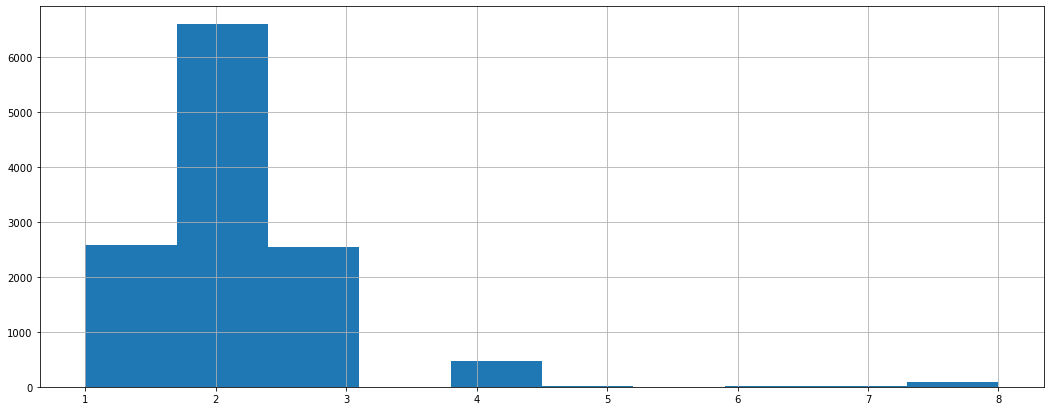

In [38]:
df['OperatingSystems'].hist()

In [41]:
#checking the months with most no.of customers visiting the online shopping sites

df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

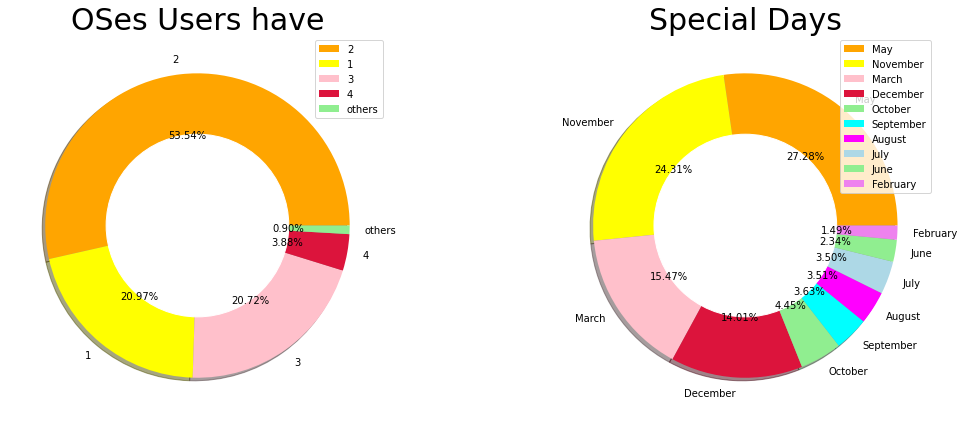

In [42]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

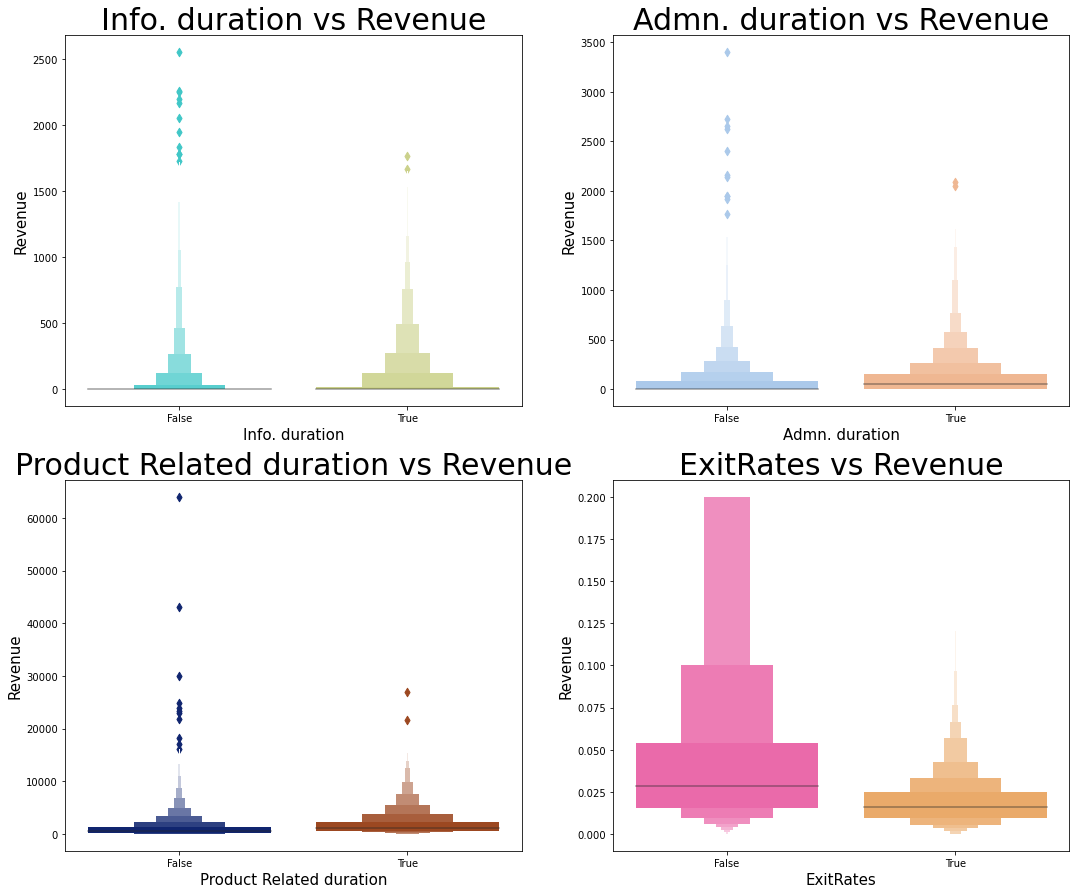

In [43]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1)
sns.boxenplot(df['Revenue'], df['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()

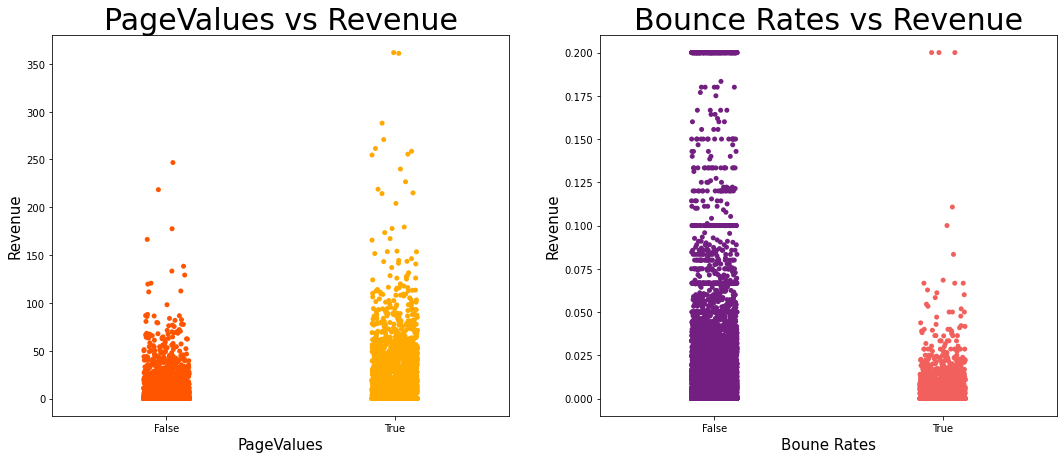

In [44]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()


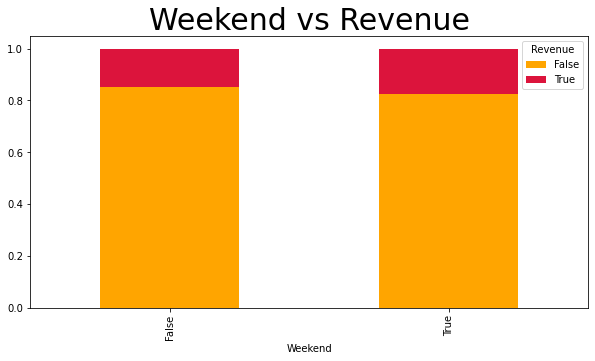

In [48]:
# weekend vs Revenue

df_ = pd.crosstab(df['Weekend'], df['Revenue'])
df_.div(df_.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

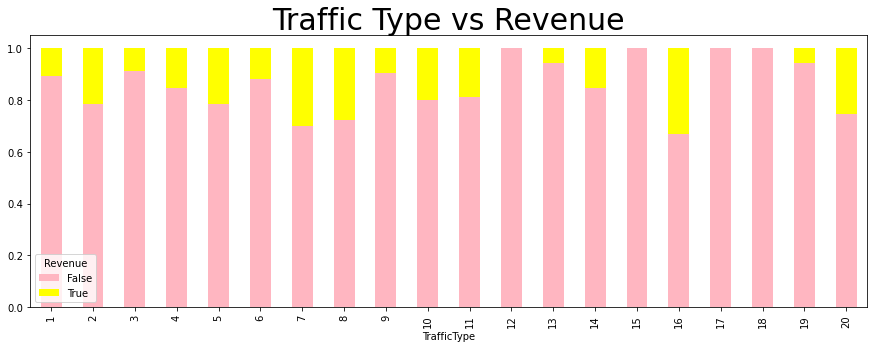

In [50]:
# Traffic Type vs Revenue

df_ = pd.crosstab(df['TrafficType'], df['Revenue'])
df_.div(df_.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

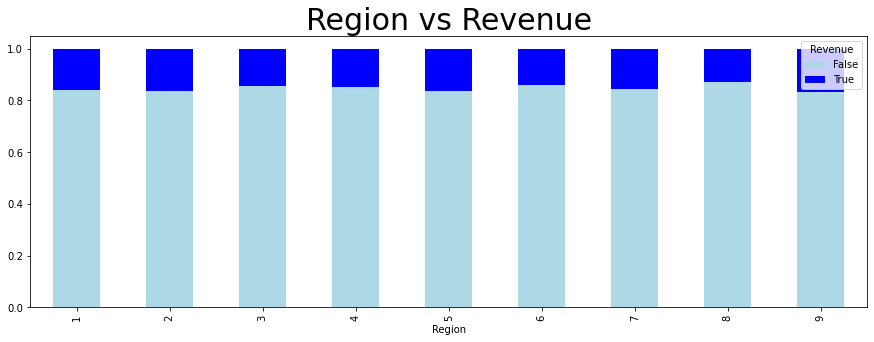

In [51]:
# region vs Revenue

df_ = pd.crosstab(df['Region'], df['Revenue'])
df_.div(df_.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

Text(0.5, 1.0, 'LM Plot between Admistrative and Information')

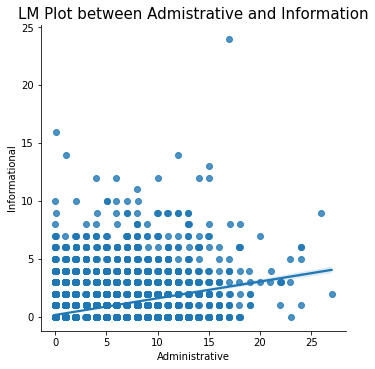

In [53]:
# lm plot

plt.rcParams['figure.figsize'] = (20, 20)

sns.lmplot(x = 'Administrative', y = 'Informational', data = df, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)

## Multi-Variate Analysis

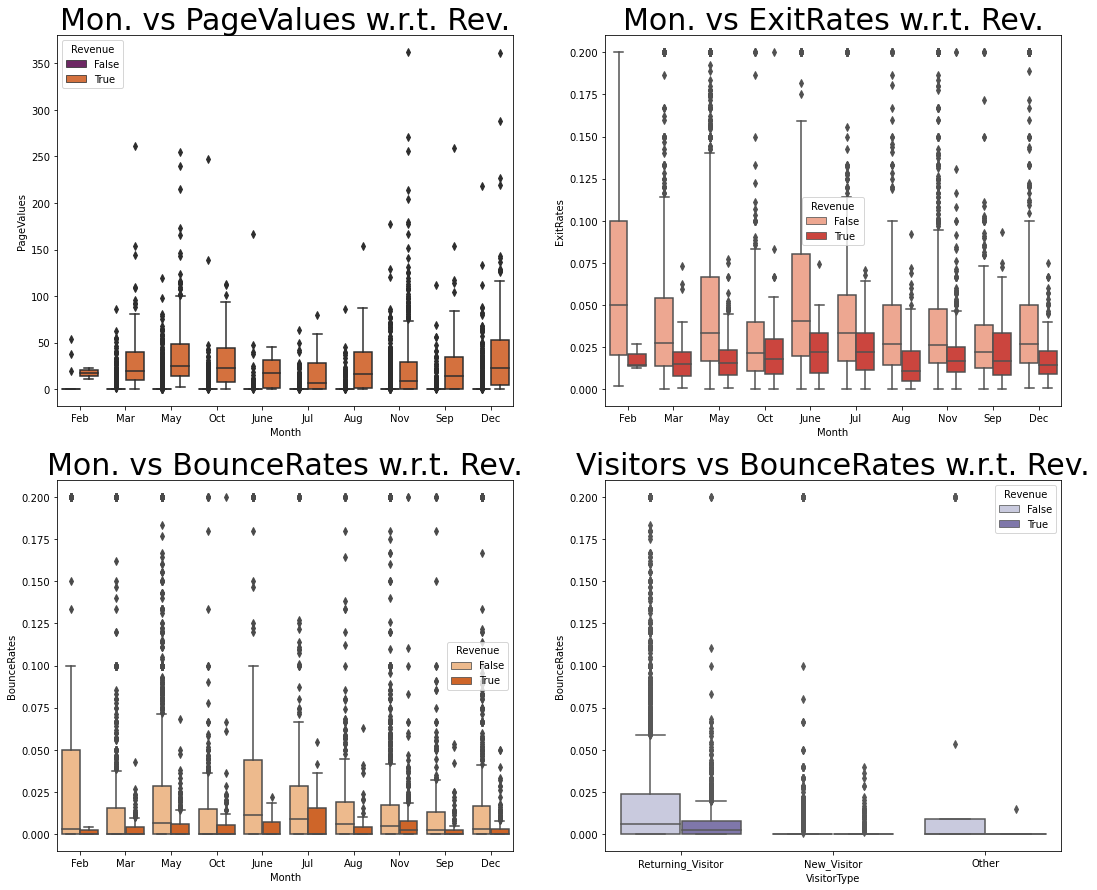

In [140]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (18, 15)
plt.subplot(2, 2, 1)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

## Data preprocessing: data cleansing, one hot encoding and split sets

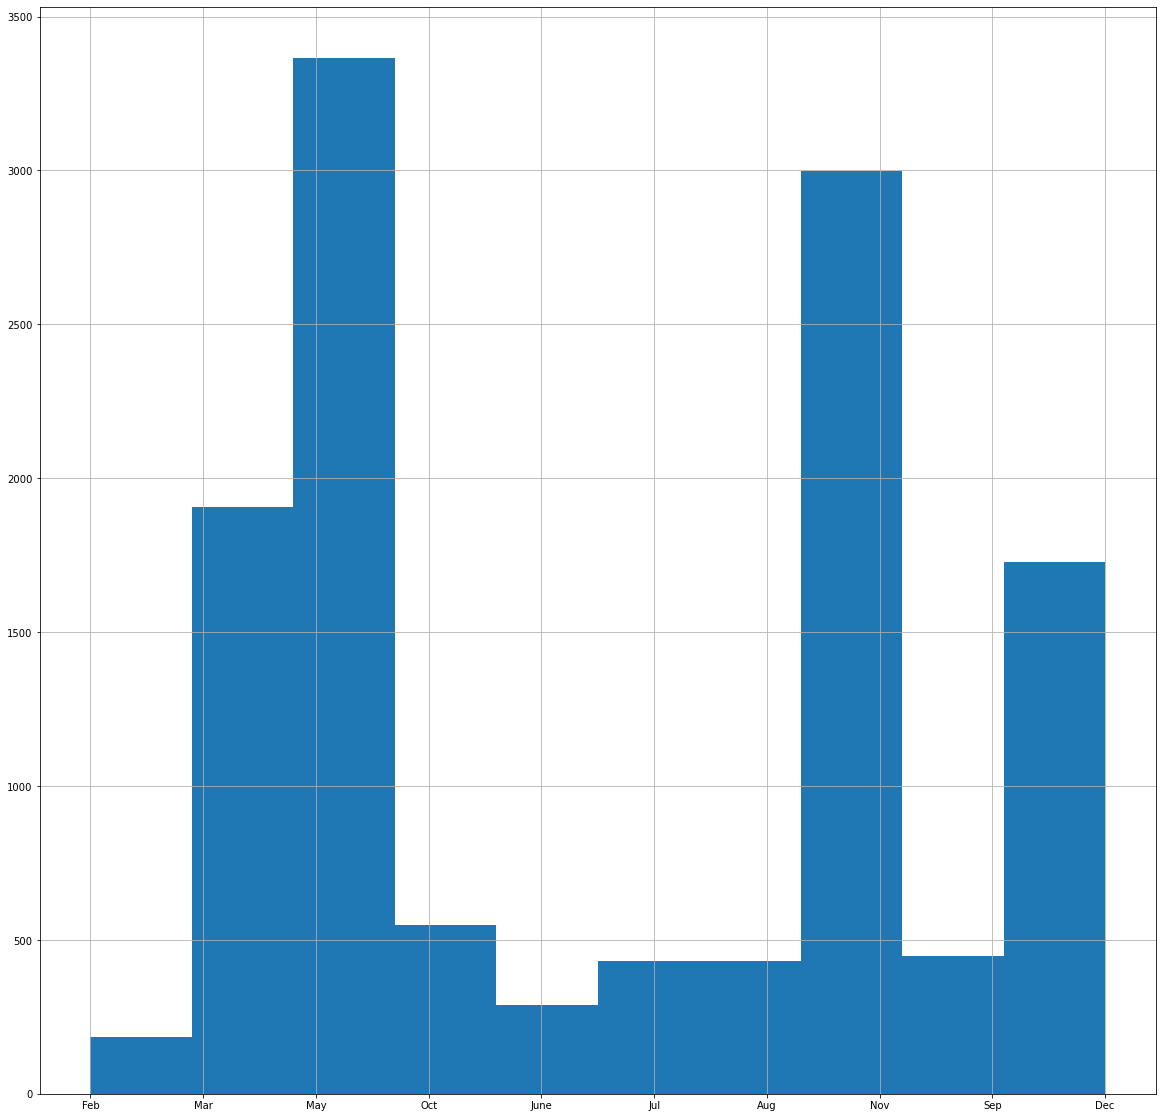

In [59]:
df['Month'].hist()

# Data preprocessing

## Correlation analysis

##  Separating train set and test set

In [82]:
trainset = ['May', 'Nov', 'Dec', 'Oct' ,'Sep' ,'Aug', 'Jul', 'June']
  
# selecting rows based on condition
df_train = df[df['Month'].isin(trainset)]

In [88]:
df_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2091,0,0.0,0,0.0,15,292.694444,0.000000,0.005128,54.980000,0.0,May,3,2,4,4,Returning_Visitor,False,True
2092,0,0.0,0,0.0,24,654.066667,0.000000,0.001449,0.000000,0.8,May,3,2,1,2,Returning_Visitor,False,False
2093,2,254.0,1,39.0,95,4990.959524,0.004124,0.015308,5.638103,0.0,May,2,2,1,6,Returning_Visitor,False,True
2094,0,0.0,0,0.0,4,158.000000,0.050000,0.100000,0.000000,0.0,May,2,2,4,13,Returning_Visitor,False,False
2095,0,0.0,0,0.0,77,3332.208333,0.002041,0.024720,0.000000,0.6,May,2,2,3,6,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


##  Validation test

In [83]:
testset = ['Feb','Mar']
  
# selecting rows based on condition
df_test = df[df['Month'].isin(testset)]

In [89]:
df_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,1,78.0,0,0.0,21,555.894444,0.00,0.002381,24.750476,0.0,Mar,1,1,1,2,New_Visitor,False,True
2087,0,0.0,0,0.0,19,429.633333,0.00,0.005263,0.000000,0.0,Mar,2,4,1,3,Returning_Visitor,True,False
2088,0,0.0,0,0.0,10,111.000000,0.00,0.020000,0.000000,0.0,Mar,2,4,7,3,Returning_Visitor,False,False
2089,0,0.0,0,0.0,1,0.000000,0.20,0.200000,0.000000,0.0,Mar,3,2,1,3,Returning_Visitor,True,False


##  Sparce dataframe 

In [100]:
data = pd.get_dummies(df_train)

data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Jul', 'Month_June',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [101]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    8526
1    1713
Name: Revenue, dtype: int64

In [102]:
# getting dependent and independent variables

#x = data1
# removing the target column revenue from x
x = data.drop(['Revenue'], axis = 1)

y = data['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (10239, 26)
Shape of y: (10239,)


In [103]:
# splitting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (7167, 26)
Shape of y_train : (7167,)
Shape of x_test : (3072, 26)
Shape of y_test : (3072,)


## Correlation analysis

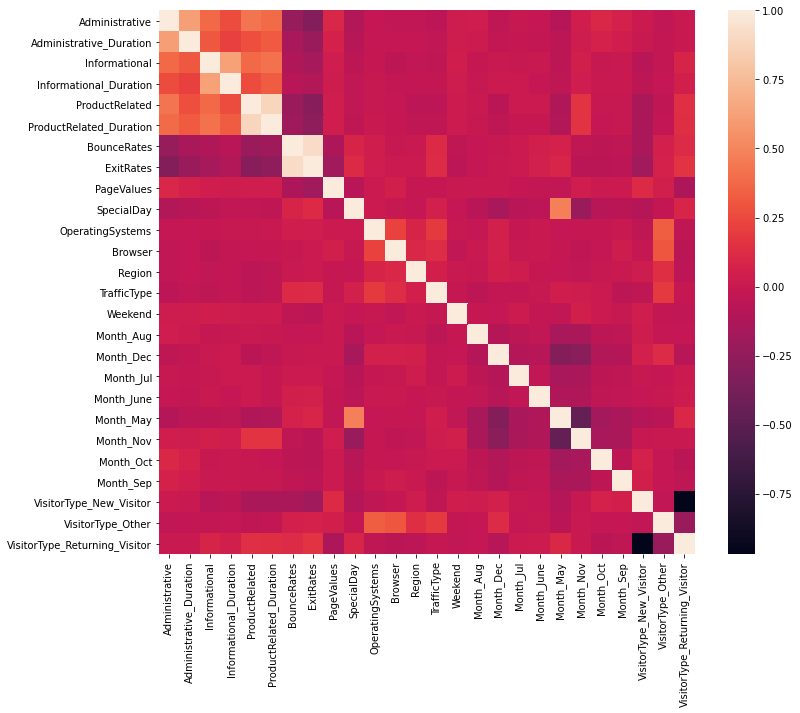

In [112]:
# Visual inspection of features
plt.figure(figsize=(12,10))
### START CODE HERE ###
# Compute the Pearson Correlation of each feature in the X_train
cor = x_train.corr()
### END CODE HERE ###
# Plot the correlations
sns.heatmap(cor)
plt.show()
# Some intersting correlations pop up that need further analysis (later)
# we need to eliminate features that have very high absolute correlations

In [113]:
### START CODE HERE ###
cor = cor.fillna(1)
### END CODE HERE ###

In [117]:
### START CODE HERE ###
# Initialize a list indicating whether to keep a column in the training df
# For now, set all entries to True
keep_columns = np.full((cor.shape[0],), True, dtype=bool)
# Loop over all columns
for i in range(cor.shape[0]-1):
    # Loop over all columns to the right of the current one
    for j in range(i+1, cor.shape[0]-1):
        # If the absolute correlation between the current two columns is greater than or equal to 0.8, or no correlation 0 value...
        if (np.abs(cor.iloc[i,j]) >= 0.8):
            # If we haven't already told the keep_columns list to drop column j...
            if keep_columns[j]:
                # Drop column j
                keep_columns[j] = False
# Extract the columns to keep from the training df
selected_columns = x_train.columns[keep_columns]
# Make a new df with the columns we've decided to keep from the training df
x_train_reduced = x_train[selected_columns]
x_test_reduced = x_test[selected_columns]
### END CODE HERE ###
print('The following columns are present in the new data:')
print(selected_columns)
print(f'The old data had {x_train.shape[1]} features. The new df has {x_train_reduced.shape[1]} features.')
x_train_reduced.head()

The following columns are present in the new data:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend', 'Month_Aug', 'Month_Dec', 'Month_Jul', 'Month_June',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')
The old data had 26 features. The new df has 24 features.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,...,Month_Dec,Month_Jul,Month_June,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
8321,1,111.00,0,0.0,13,0.000000,0.0,0.0,1,1,...,0,0,0,0,1,0,0,1,0,0
11711,0,0.00,0,0.0,12,0.016667,0.0,0.0,1,1,...,0,0,0,0,1,0,0,0,0,1
4663,8,228.50,0,0.0,5,0.000000,0.0,0.0,1,2,...,0,0,0,1,0,0,0,1,0,0
9626,2,21.75,0,0.0,6,0.033333,0.0,0.0,3,2,...,1,0,0,0,0,0,0,0,0,1
10051,2,69.50,0,0.0,21,0.027273,0.0,0.0,2,2,...,1,0,0,0,0,0,0,0,0,1


## Normalizing dataframe

In [122]:
from sklearn.preprocessing import normalize  # you can use this module, (but you don't have to)
### START CODE HERE ###
X_train_reduced = normalize(X_train_reduced, axis=0, norm='max')
X_test_reduced = normalize(X_test_reduced, axis=0, norm='max')
### END CODE HERE ###

## Feature importance

Feature ranking:
1. feature 6 (0.318154)
2. feature 4 (0.104217)
3. feature 5 (0.075530)
4. feature 1 (0.068986)
5. feature 0 (0.068826)
6. feature 10 (0.059786)
7. feature 11 (0.059177)
8. feature 8 (0.040351)
9. feature 9 (0.037476)
10. feature 2 (0.036923)
11. feature 3 (0.036399)
12. feature 12 (0.018114)
13. feature 18 (0.017904)
14. feature 21 (0.009489)
15. feature 23 (0.008587)
16. feature 17 (0.008112)
17. feature 7 (0.006762)
18. feature 14 (0.005802)
19. feature 15 (0.004360)
20. feature 19 (0.004231)
21. feature 20 (0.004156)
22. feature 13 (0.003821)
23. feature 16 (0.002271)
24. feature 22 (0.000565)


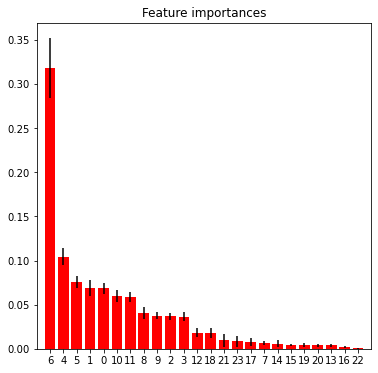

In [121]:
# Use Random Forest to get feature ranks/importances for each feature
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X_train_reduced, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_reduced.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_reduced.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_reduced.shape[1]), indices)
plt.xlim([-1, X_train_reduced.shape[1]])
plt.show()

## Logistic regression

Training Accuracy : 0.8730291614343519
Testing Accuracy : 0.8701171875
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2546
           1       0.74      0.37      0.49       526

    accuracy                           0.87      3072
   macro avg       0.81      0.67      0.71      3072
weighted avg       0.86      0.87      0.85      3072



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


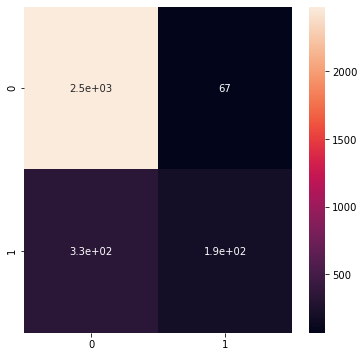

In [123]:
# MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(x_train_reduced, y_train)

y_pred = model.predict(x_test_reduced)

# evaluating the model
print("Training Accuracy :", model.score(x_train_reduced, y_train))
print("Testing Accuracy :", model.score(x_test_reduced, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

## Interpretability layer

In [127]:
# finding the Permutation importance

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test_reduced, y_test)
eli5.show_weights(perm, feature_names = x_test_reduced.columns.tolist())

Weight,Feature
0.0919 ± 0.0097,PageValues
0.0014 ± 0.0008,Month_Dec
0.0013 ± 0.0011,VisitorType_Returning_Visitor
0.0005 ± 0.0011,Month_Nov
0.0004 ± 0.0005,Administrative_Duration
0.0003 ± 0.0022,ProductRelated
0.0001 ± 0.0003,Informational
0.0001 ± 0.0003,Month_Oct
0.0001 ± 0.0015,OperatingSystems
0 ± 0.0000,Month_Sep


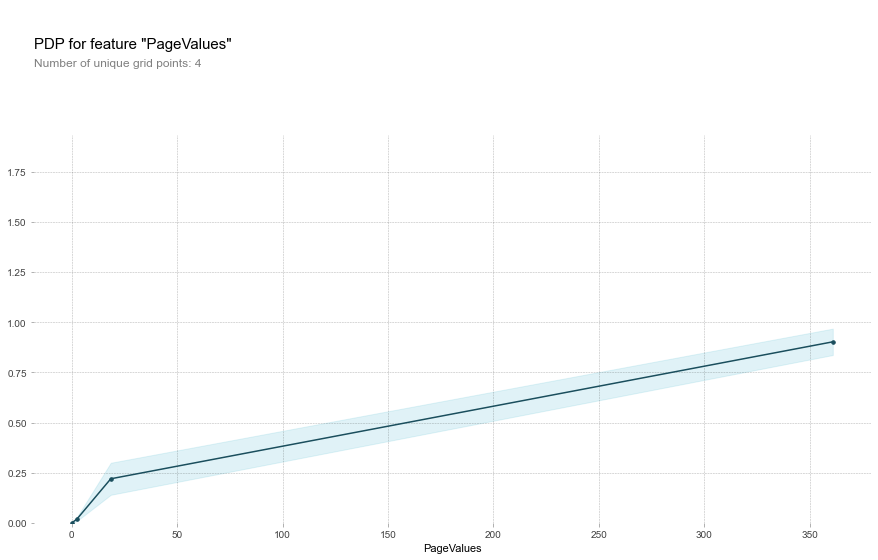

In [183]:
# plotting the partial dependence plot for adminisrative duration

# importing pdp
from pdpbox import pdp, info_plots

base_features = x_test_reduced.columns.values.tolist()

feat_name = 'PageValues'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test_reduced, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


We can infer that as long as the Page value is bigger, the probability to have a better costumer experience is likely to be higher 

## Task 2

### Clustering plots for bivariate relations

####  Administrative duration versus Bounce rate

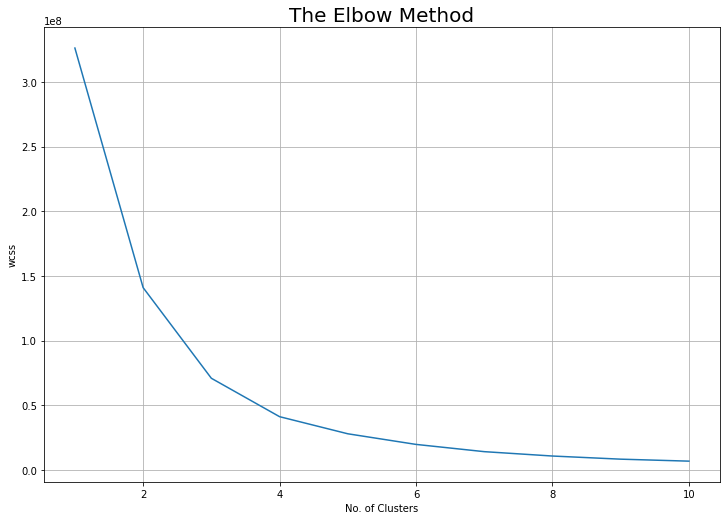

In [145]:
# Q1: Time Spent by The Users on Website vs Bounce Rates

'''
Bounce Rate :The percentage of visitors to a particular website who navigate away from the site after 
viewing only one page.
'''
# let's cluster Administrative duration and Bounce Ratw to different types of clusters in the dataset.
# preparing the dataset
x = data.iloc[:, [1, 6]].values

# checking the shape of the dataset
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


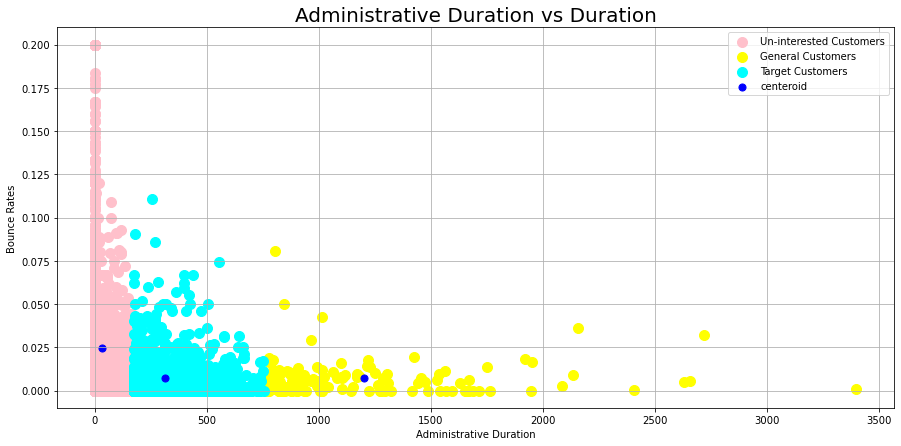

In [142]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()


From clustering plot it's possible to infer that costumers with longer administrative duration are less likely to bounce from the website, therefore the target costumer represented as the yellow cluster is the patter that we are looking for in order to attack with promotion and retention, or possible personalization strategies. 

#### Informative Duration vs Bounce Rates

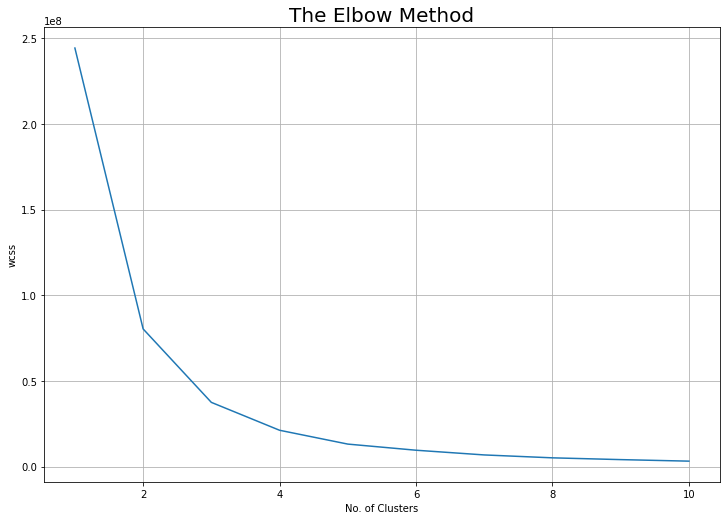

In [144]:
# informational duration vs Bounce Rates
x = df.iloc[:, [3, 6]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

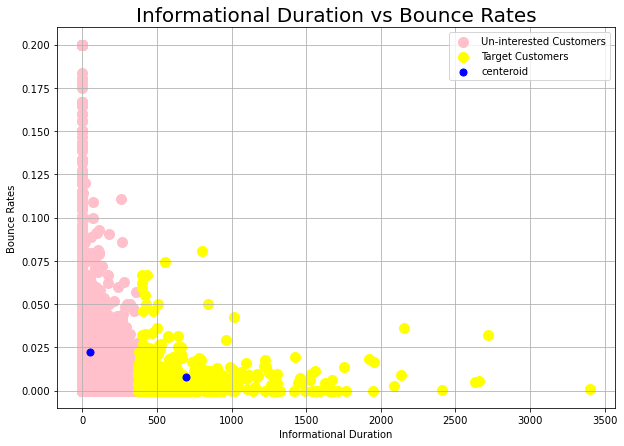

In [146]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

#### Administrative Duration vs Exit Rates

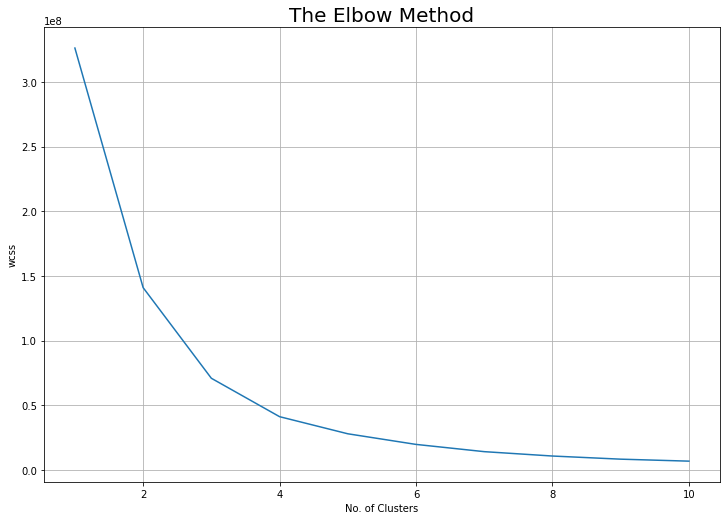

In [148]:
# informational duration vs Bounce Rates
x = data.iloc[:, [1, 7]].values

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

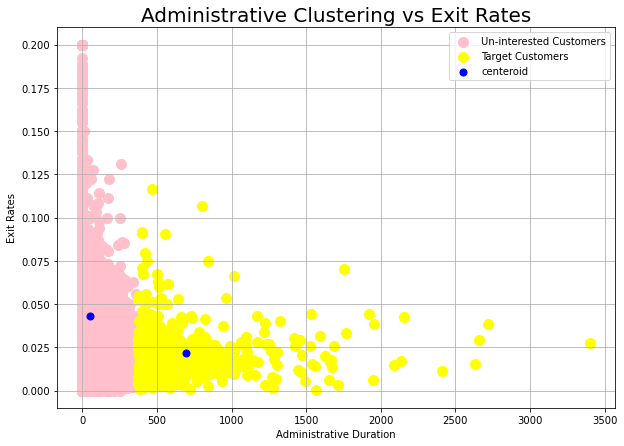

In [149]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

### Clustering and PCA  

Let's have a look of how is the variance of clustering explained by a reduction of dimensionality in order to have perspective of the clustering shape. For this task we need the functionality of PCA and kmeans togheter. 

In [163]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [160]:
scaler = StandardScaler()
scaler.fit(data)
X_scale = scaler.transform(data)
df_scale = pd.DataFrame(X_scale, columns=data.columns)
df_scale.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Jul,Month_June,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.711386,-0.469181,-0.409236,-0.246065,-0.408658,-0.485937,-0.463839,-0.783597,2.511125,-0.330420,...,-0.450433,-0.209881,-0.170123,1.42958,-0.643453,-0.238026,-0.213907,-0.407969,-0.091494,0.421716
1,-0.711386,-0.469181,-0.409236,-0.246065,-0.218302,-0.307892,-0.463839,-0.861297,-0.327224,3.458125,...,-0.450433,-0.209881,-0.170123,1.42958,-0.643453,-0.238026,-0.213907,-0.407969,-0.091494,0.421716
2,-0.125064,0.953710,0.368017,0.022321,1.283391,1.828858,-0.376225,-0.568604,-0.036157,-0.330420,...,-0.450433,-0.209881,-0.170123,1.42958,-0.643453,-0.238026,-0.213907,-0.407969,-0.091494,0.421716
3,-0.711386,-0.469181,-0.409236,-0.246065,-0.641314,-0.552300,0.598476,1.220114,-0.327224,-0.330420,...,-0.450433,-0.209881,-0.170123,1.42958,-0.643453,-0.238026,-0.213907,-0.407969,-0.091494,0.421716
4,-0.711386,-0.469181,-0.409236,-0.246065,0.902680,1.011606,-0.420479,-0.369816,-0.327224,2.510988,...,-0.450433,-0.209881,-0.170123,1.42958,-0.643453,-0.238026,-0.213907,-0.407969,-0.091494,0.421716


In [175]:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

[0.13227072 0.09137325 0.06860201]


Text(0, 0.5, 'Inertia')

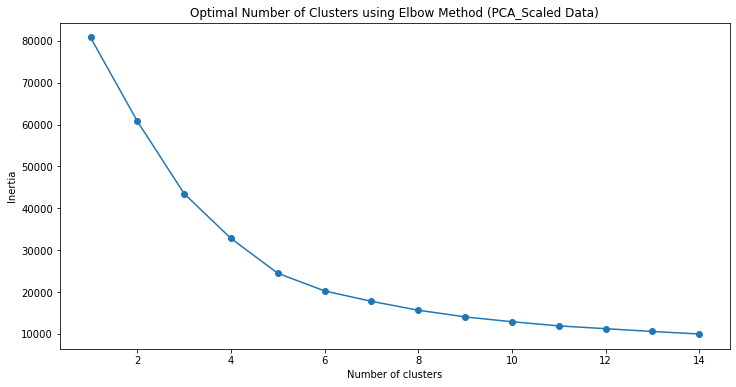

In [176]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Elbow metric shows that 5 clusters may be a good fit

In [179]:
kmeans_pca_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.3950995911342595


Silhouette score also has to be close to 0 as a healty metric

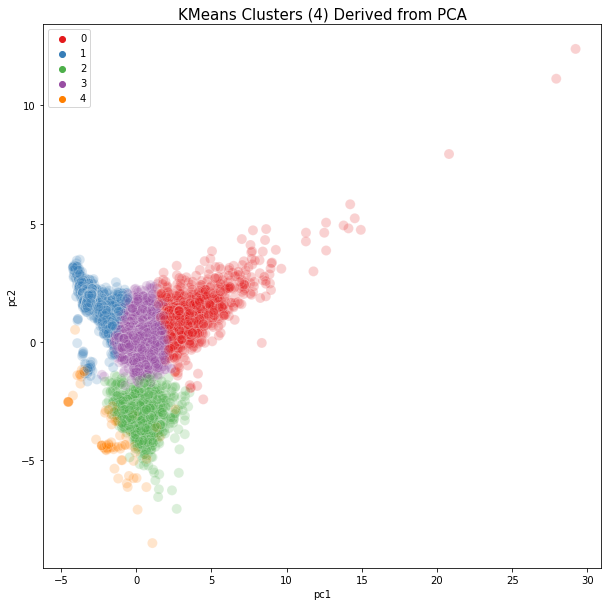

In [180]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1], hue=labels_pca_scale, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

## Conclusions

In the midterm projects of data science was basically a data analytics model with supervised and unsupervised modelling. 
- Involving data ingestion from a freely kaggle dataset
- Data prep and data analysis (correlations, dummy variables, one hot encoding, etc)
- Logisitc regressor classificator for predictive modelling.
- DataViz to have a deeper understanding of customer behaviour.
- Clustering technique in order to have better understanding about the phenomena. 
- Dimensionality reduction with PCA in order to have a better perspective of variance within the features.
